# Time Resampling



In [1]:
import pandas as pd
import numpy as np


In [2]:
#parse_dates - converts into datetime 
covid = pd.read_csv('covid_19_world.csv',index_col='ObservationDate', parse_dates=True)

Note: the above code is a faster way of doing the following:
<pre>covid = pd.read_csv('covid_19_world.csv')
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])
covid.set_index('Date',inplace=True)</pre>

In [3]:
datewise_covid = covid.groupby(['ObservationDate']).agg({'Confirmed': 'sum','Deaths':'sum','Recovered':'sum'})
datewise_covid.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [4]:
df2 = datewise_covid.diff()
df2.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0


In [5]:
covid.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
India_data = covid[covid['Country/Region']=='India']
datewise_india = India_data.groupby(['ObservationDate']).agg({'Confirmed': 'sum','Deaths':'sum','Recovered':'sum'})
datewise_india.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0


In [7]:
df = datewise_india.diff()

In [8]:
df.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0
2020-02-02,1.0,0.0,0.0
2020-02-03,1.0,0.0,0.0


In [9]:
df.tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-08-08,64399.0,861.0,53879.0
2020-08-09,62064.0,1007.0,54859.0
2020-08-10,53601.0,871.0,47746.0
2020-08-11,60963.0,834.0,56110.0
2020-08-12,66999.0,942.0,56383.0


In [10]:
df.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0
2020-02-02,1.0,0.0,0.0
2020-02-03,1.0,0.0,0.0


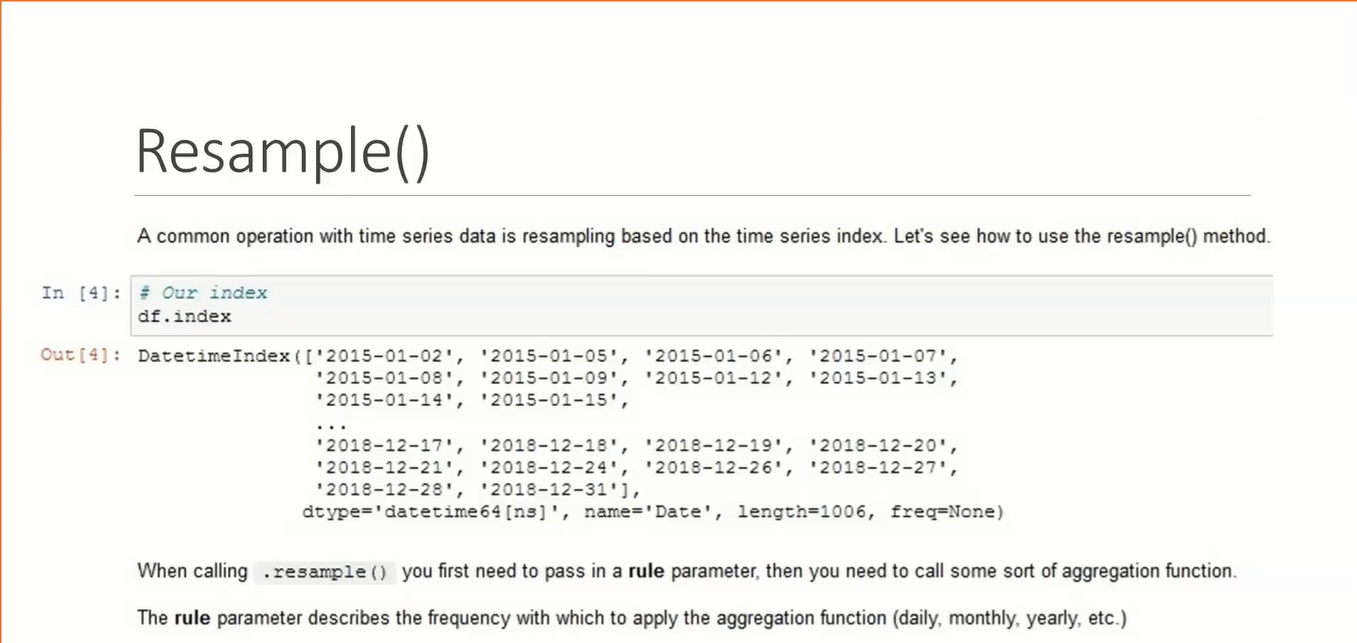

In [11]:
# Our index
df.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10',
               '2020-08-11', '2020-08-12'],
              dtype='datetime64[ns]', name='ObservationDate', length=196, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)
It is passed in using an "offset alias" - refer to the table below:

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [12]:
# Monthly Mean
df.resample(rule='M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.000000,0.000000,0.000000
2020-02-29,0.068966,0.000000,0.103448
2020-03-31,44.967742,1.129032,3.870968
2020-04-30,1115.533333,37.300000,298.166667
2020-05-31,5024.064516,137.225806,2670.451613
2020-06-30,13162.800000,399.733333,8537.566667
2020-07-31,35822.419355,616.483871,24077.258065
2020-08-31,58387.416667,876.833333,50134.000000


In [13]:
df.resample(rule='M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.0,0.0,0.0
2020-02-29,2.0,0.0,3.0
2020-03-31,1394.0,35.0,120.0
2020-04-30,33466.0,1119.0,8945.0
2020-05-31,155746.0,4254.0,82784.0
2020-06-30,394884.0,11992.0,256127.0
2020-07-31,1110495.0,19111.0,746395.0
2020-08-31,700649.0,10522.0,601608.0


In [14]:
df.resample(rule='M').max()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.0,0.0,0.0
2020-02-29,1.0,0.0,3.0
2020-03-31,227.0,8.0,28.0
2020-04-30,1893.0,75.0,702.0
2020-05-31,8782.0,269.0,11707.0
2020-06-30,22169.0,2003.0,17634.0
2020-07-31,98807.0,1530.0,66992.0
2020-08-31,66999.0,1007.0,56383.0


In [15]:
df2.resample(rule='M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,1041.111111,21.777778,21.555556
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,24886.258065,1263.419355,4459.548387
2020-04-30,79978.633333,6376.033333,27890.833333
2020-05-31,93874.193548,4472.483871,52470.193548
2020-06-30,143629.733333,4640.600000,90398.100000
2020-07-31,229806.387097,5427.322581,161802.193548
2020-08-31,251750.916667,5821.500000,204806.250000


In [16]:
df2.resample(rule='M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9370.0,196.0,194.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,771474.0,39166.0,138246.0
2020-04-30,2399359.0,191281.0,836725.0
2020-05-31,2910100.0,138647.0,1626576.0
2020-06-30,4308892.0,139218.0,2711943.0
2020-07-31,7123998.0,168247.0,5015868.0
2020-08-31,3021011.0,69858.0,2457675.0


In [17]:
df2.resample(rule='M').max()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,2651.0,49.0,79.0
2020-02-29,15148.0,253.0,3996.0
2020-03-31,75098.0,4525.0,15484.0
2020-04-30,101830.0,10485.0,54934.0
2020-05-31,134742.0,6592.0,107904.0
2020-06-30,191743.0,6786.0,152488.0
2020-07-31,337628.0,9953.0,236976.0
2020-08-31,285196.0,7120.0,304953.0


Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean), and reports the result as the last day of that year.

### Custom Resampling Functions

We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function:

In [18]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of sampling rate.
    """
    if len(entry):  # handles the case of missing data
        return entry[0]

In [19]:
df.resample(rule='M').apply(first_day)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,NaN,NaN,NaN
2020-02-29,0.0,0.0,0.0
2020-03-31,0.0,0.0,0.0
2020-04-30,601.0,23.0,25.0
2020-05-31,2394.0,69.0,939.0
2020-06-30,7761.0,200.0,3902.0
2020-07-31,19148.0,434.0,11881.0
2020-08-31,54735.0,853.0,51255.0


In [20]:
df2.resample(rule='M').apply(first_day)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,NaN,NaN,NaN
2020-02-29,2113.0,46.0,62.0
2020-03-31,2358.0,55.0,2934.0
2020-04-30,75118.0,4702.0,15143.0
2020-05-31,86931.0,5262.0,38574.0
2020-06-30,98906.0,3508.0,54680.0
2020-07-31,216713.0,4957.0,224412.0
2020-08-31,250643.0,5561.0,184445.0


### Plotting

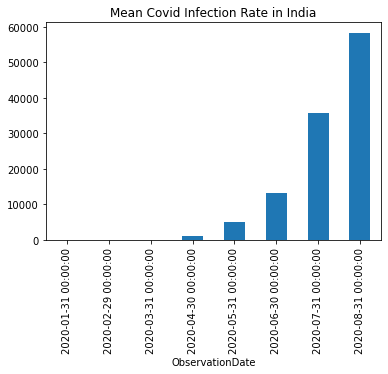

In [21]:
df['Confirmed'].resample('M').mean().plot.bar(title='Mean Covid Infection Rate in India');

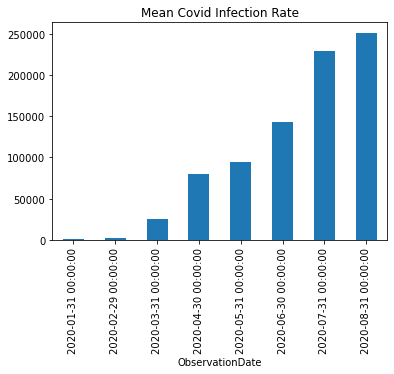

In [22]:
df2['Confirmed'].resample('M').mean().plot.bar(title='Mean Covid Infection Rate');

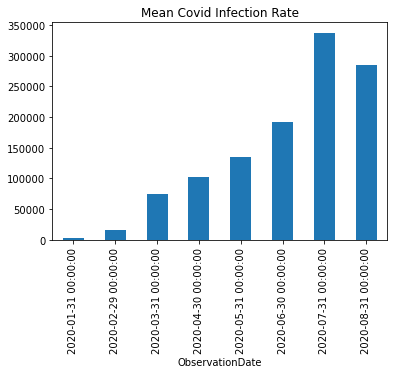

In [23]:
df2['Confirmed'].resample('M').max().plot.bar(title='Mean Covid Infection Rate');

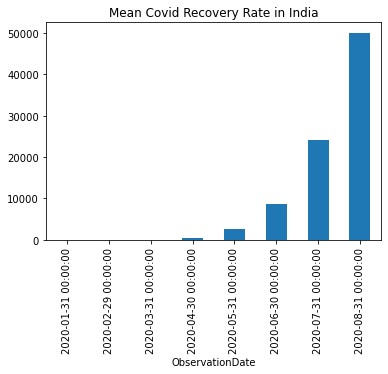

In [24]:
title = 'Mean Covid Recovery Rate in India'
df['Recovered'].resample('M').mean().plot.bar(title=title,color=['#1f77b4']);

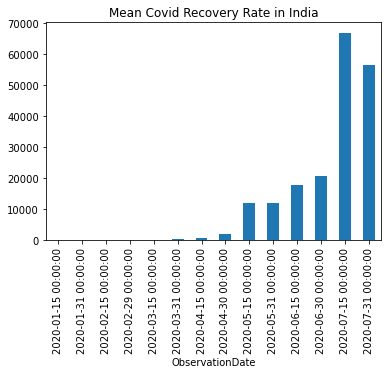

In [25]:
title = 'Mean Covid Recovery Rate in India'
df['Recovered'].resample('SM').max().plot.bar(title=title,color=['#1f77b4']);

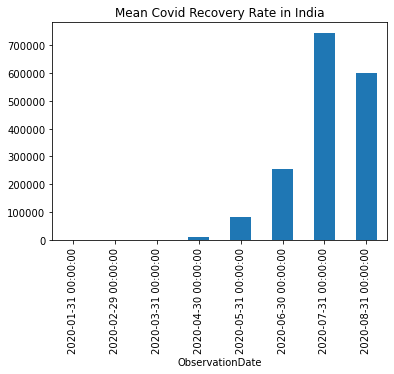

In [26]:
title = 'Mean Covid Recovery Rate in India'
df['Recovered'].resample('M').sum().plot.bar(title=title,color=['#1f77b4']);

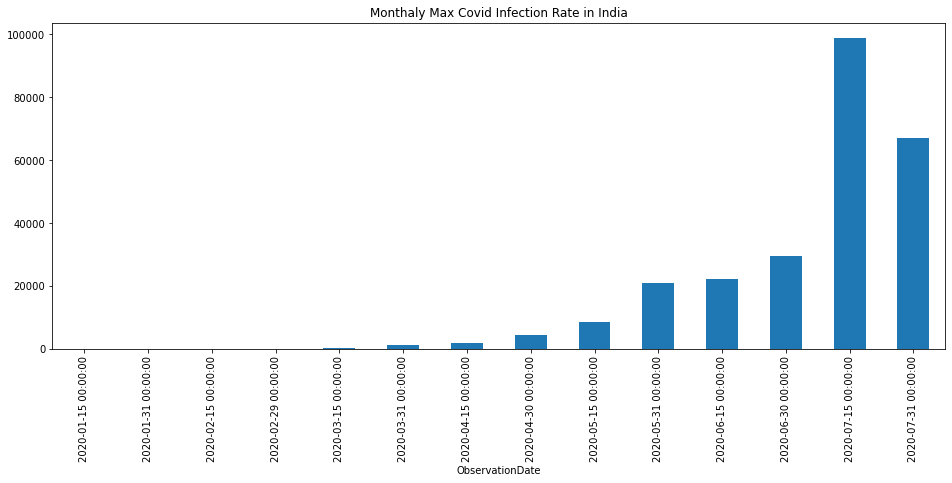

In [27]:
title = 'Monthaly Max Covid Infection Rate in India'
df['Confirmed'].resample('SM').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

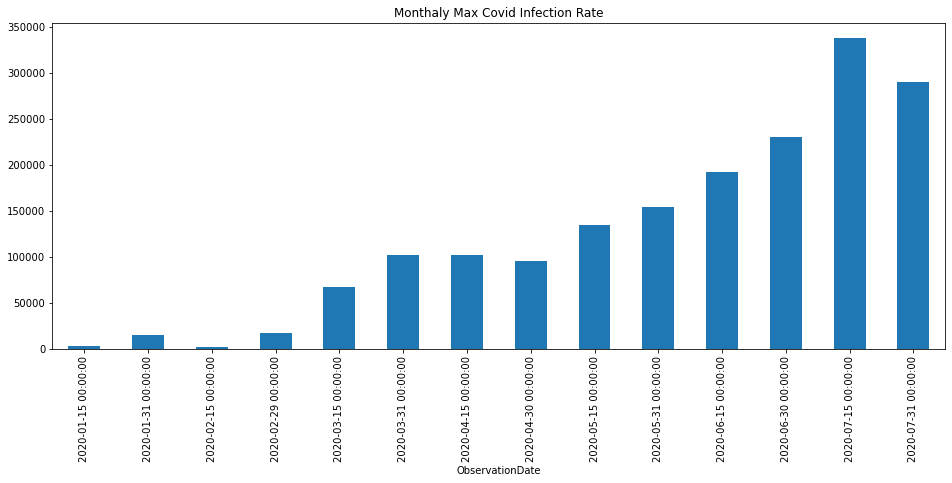

In [28]:
title = 'Monthaly Max Covid Infection Rate'
df2['Confirmed'].resample('SM').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

# Time Shifting

Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood. This isn't something we'll do often in the course, but it's definitely good to know about this anyways!

## .shift() forward
This method shifts the entire date index a given number of rows, without regard for time periods (months & years).<br>It returns a modified copy of the original DataFrame.

In [29]:
df.shift(1).head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0
2020-02-03,1.0,0.0,0.0


In [30]:
# NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-08-08,61537.0,933.0,48900.0
2020-08-09,64399.0,861.0,53879.0
2020-08-10,62064.0,1007.0,54859.0
2020-08-11,53601.0,871.0,47746.0
2020-08-12,60963.0,834.0,56110.0


## .shift() backwards

In [31]:
df.shift(-1).head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,1.0,0.0,0.0
2020-02-03,0.0,0.0,0.0


In [32]:
df.shift(-1).tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-08-08,62064.0,1007.0,54859.0
2020-08-09,53601.0,871.0,47746.0
2020-08-10,60963.0,834.0,56110.0
2020-08-11,66999.0,942.0,56383.0
2020-08-12,NaN,NaN,NaN


## Shifting based on Time Series Frequency Code

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end. <br>Refer to the <em>Time Series Offset Aliases</em> table above for a full list of values.

In [33]:
# Shift everything forward one month
df.shift(periods=1, freq='M').head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,NaN,NaN,NaN
2020-02-29,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0
2020-02-29,1.0,0.0,0.0
2020-02-29,1.0,0.0,0.0


# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [34]:
df.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0
2020-02-02,1.0,0.0,0.0
2020-02-03,1.0,0.0,0.0


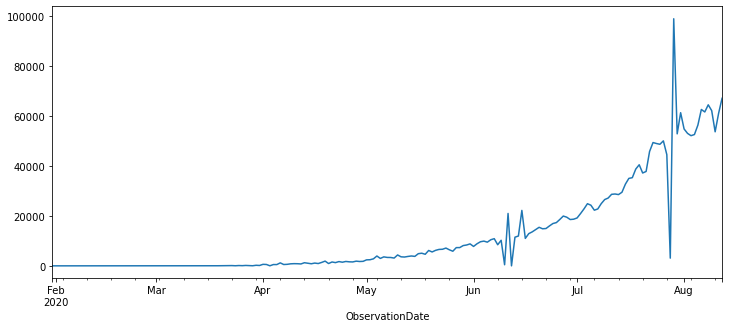

In [35]:
df['Confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

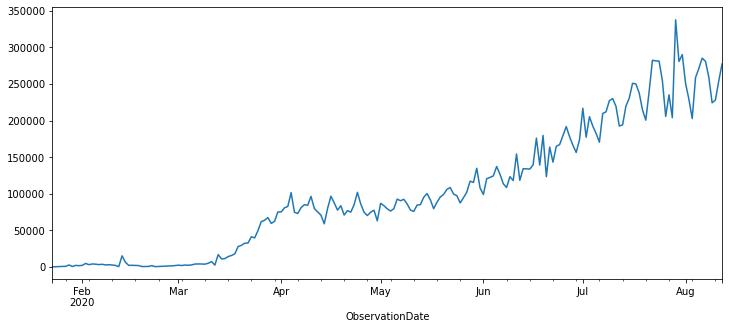

In [36]:
df2['Confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [37]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN
2020-02-06,0.285714,0.0,0.0
2020-02-07,0.285714,0.0,0.0


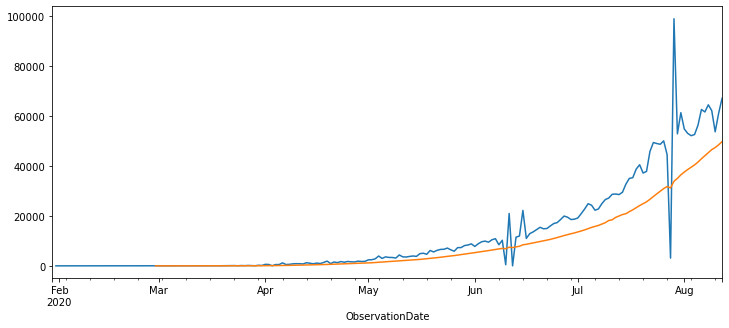

In [38]:
df['Confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Confirmed'].plot();

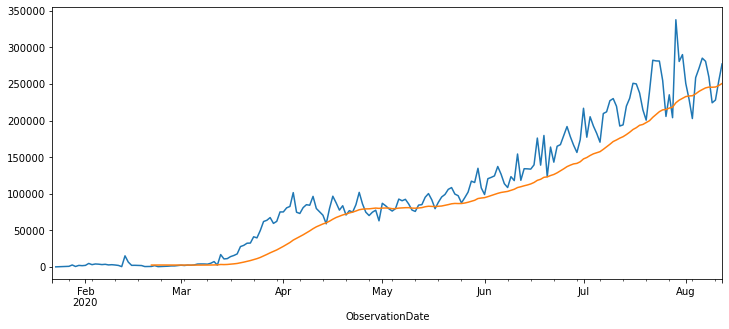

In [39]:
df2['Confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df2.rolling(window=30).mean()['Confirmed'].plot();

The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically!

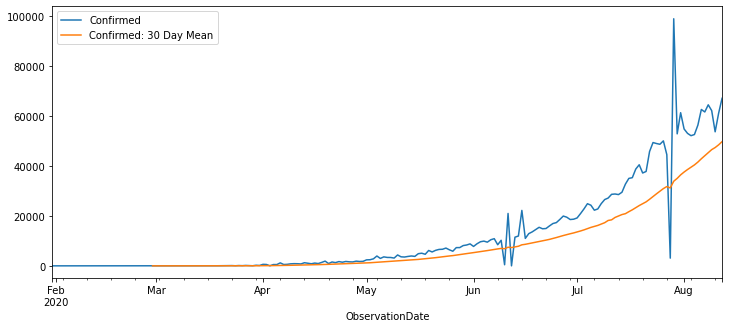

In [40]:
df['Confirmed: 30 Day Mean'] = df['Confirmed'].rolling(window=30).mean()
df[['Confirmed','Confirmed: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

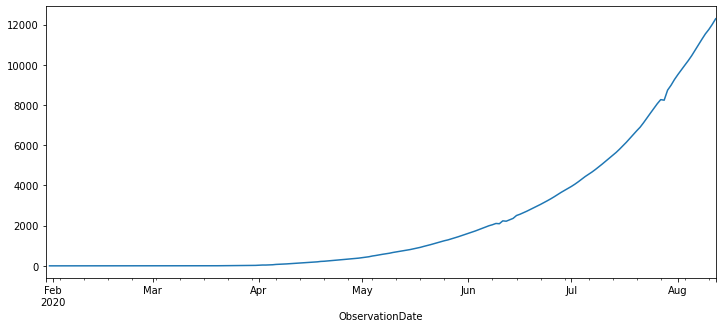

In [41]:
# df['Confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

# specify a minimum number of periods to start from
df['Confirmed'].expanding().mean().plot(figsize=(12,5));

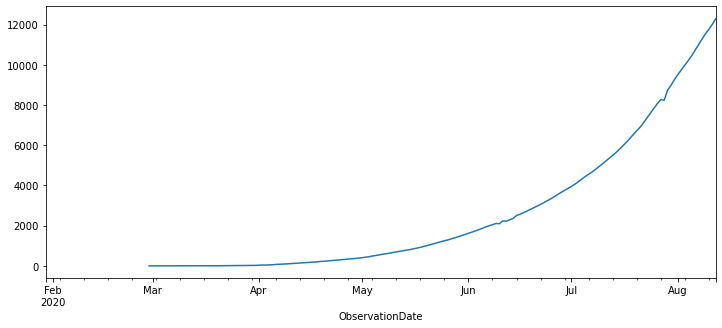

In [42]:
df['Confirmed'].expanding(min_periods=30).mean().plot(figsize=(12,5));

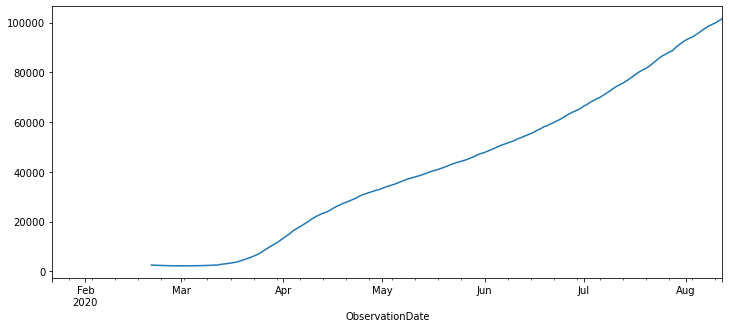

In [43]:
df2['Confirmed'].expanding(min_periods=30).mean().plot(figsize=(12,5));

# &&&&&